In [1]:
from __future__ import print_function

import pandas as pd
from pandas import Series,DataFrame

from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.optimizers import Adam




Using TensorFlow backend.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
wine_data_set = pd.read_csv("/content/drive/My Drive/DNN/WINE/winequality-white2.csv",header=0)

In [0]:
#説明変数(ワインに含まれる成分)
x = DataFrame(wine_data_set.drop("quality", axis=1))

#目的変数(各ワインの品質を10段階評価したもの)
y = DataFrame(wine_data_set["quality"])

#説明変数・目的変数をそれぞれ訓練データ・テストデータに分割
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.05)


#データの整形
x_train = x_train.astype(np.float)
x_test = x_test.astype(np.float)

y_train = keras.utils.to_categorical(y_train,10)
y_test = keras.utils.to_categorical(y_test,10)

In [10]:
#ニューラルネットワークの実装①
model = Sequential()

model.add(Dense(128, activation='relu', input_shape=(11,)))
model.add(Dense(128, activation='relu', input_shape=(11,)))
model.add(Dense(128, activation='relu', input_shape=(11,)))
model.add(Dropout(0.2))
model.add(Dense(10, activation='sigmoid'))

model.summary()

#ニューラルネットワークの実装②
model.compile(loss='mean_squared_error',optimizer=RMSprop(), metrics=['accuracy'])
#勾配法には、Adam(lr=1e-3)という方法もある（らしい）。

#ニューラルネットワークの学習
history = model.fit(x_train, y_train,batch_size=200,epochs=1000,verbose=1,validation_data=(x_test, y_test))

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 128)               1536      
_________________________________________________________________
dense_14 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_15 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 10)                1290      
Total params: 35,850
Trainable params: 35,850
Non-trainable params: 0
_________________________________________________________________
Train on 4653 samples, validate on 245 samples
Epoch 1/1000
4653/4653 [==============================] - 0s 87us/ste

245/245 [==============================] - 0s 78us/step


Test loss: 0.07099676241680067
Test accuracy: 0.5020408164481728


--サンプルワインのデータ--
[7.1, 0.26, 0.49, 2.2, 0.032, 31, 200, 0.9903, 3.37, 0.42, 20]


--予測値--
[8]




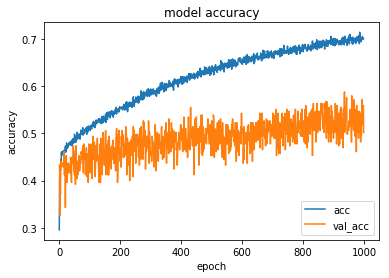

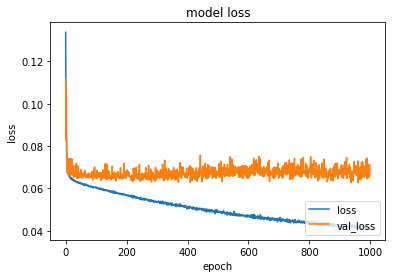

In [21]:
score = model.evaluate(x_test,y_test,verbose=1)
print("\n")
print("Test loss:",score[0])
print("Test accuracy:",score[1])

#10段階評価したいワインの成分を設定
sample = [7.1, 0.26, 0.49, 2.2, 0.032, 31, 200, 0.9903, 3.37, 0.42, 20]
print("\n")
print("--サンプルワインのデータ--")

print(sample)

#ポイント：ワインの成分をNumpyのArrayにしないとエラーが出る
sample = np.array(sample)
predict = model.predict_classes(sample.reshape(1,-1),batch_size=1,verbose=0)

print("\n")
print("--予測値--")
print(predict)
print("\n")
def plot_history(history):
    # print(history.history.keys())

    # 精度の履歴をプロット
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(['acc', 'val_acc'], loc='lower right')
    plt.show()

    # 損失の履歴をプロット
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['loss', 'val_loss'], loc='lower right')
    plt.show()

# 学習履歴をプロット
plot_history(history)